# Gathering Data

In [2]:
import requests 
import re
import csv
import pandas as pd
import tweepy 
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

In [2]:
get_file=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
assert(get_file.status_code==200) #200 Status code confirms  connection succesfully established


In [143]:
with open('image_predictions.tsv', 'w') as f:      
    writer = csv.writer(f)
    reader = csv.reader(get_file.text.splitlines(), delimiter='\t') 
    #File is Tsv Seperated Changed the file To csv through delimiter
    for row in reader:
        writer.writerow(row)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
TwitterArchive=pd.read_csv('twitter-archive-enhanced.csv')
TweetIds=TwitterArchive['tweet_id']

In [ ]:
with open("tweet_json.txt","a+") as File:
    for Tweets in TweetIds:
        try:
            twee=api.get_status(Tweets, tweet_mode='extended')
            File.write(json.dumps({"Tweet_id":int(Tweets),"Retweet_count":twee.retweet_count,
                                   "Like_Count":twee.favorite_count,"Language":twee.lang})+"\n") 
            #Wrote the File from Twitter API
        except:
            
            print(Tweets,"not Found") #Id missing

888202515573088257 not Found
873697596434513921 not Found
869988702071779329 not Found
866816280283807744 not Found
861769973181624320 not Found
845459076796616705 not Found
842892208864923648 not Found
837012587749474308 not Found
827228250799742977 not Found
802247111496568832 not Found
775096608509886464 not Found
Rate limit reached. Sleeping for: 728
Rate limit reached. Sleeping for: 728


In [3]:
TweetLikes=pd.read_json('tweet_json.txt',lines=True)
TwitterArchive=pd.read_csv('twitter-archive-enhanced.csv')
TwitterImage=pd.read_csv('image_predictions.tsv')

In [4]:
Archive=TwitterArchive.copy()
Image=TwitterImage.copy()
Likes=TweetLikes.copy()

# Assessing

In [6]:
Archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
Archive['source'].value_counts() #Repetation

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
Archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [14]:
Image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
Image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [69]:
Likes.head(5)

,Language,Like_Count,Retweet_count,Tweet_id
0,en,39018,8659,892420643555336193
1,en,33401,6358,892177421306343426
2,en,25188,4224,891815181378084864
3,en,42369,8769,891689557279858688
4,en,40519,9538,891327558926688256


In [18]:
Likes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Language         2345 non-null object
Like_Count       2345 non-null int64
Retweet_count    2345 non-null int64
Tweet_id         2345 non-null int64
dtypes: int64(3), object(1)
memory usage: 91.6+ KB


In [10]:
#Check for Floating Numerator Variable

Filtering=Archive.loc[Archive["rating_numerator"] > 0,['text',"rating_numerator"]] #Filtering by rating
Filtering['debugged']=(Filtering['text'].apply(lambda x: re.findall('[0-9]+\.[0-9]+',x))) #Check for regex
Filtering['value_changed']=Filtering['debugged'].apply(lambda x: len(x)!=0) 
#Check if Floating Point is Found
Filtering.loc[Filtering['value_changed']] #Display the data Frame for which the floatig point variable




,text,rating_numerator,debugged,value_changed
45,This is Bella. She hopes her smile made you sm...,5,[13.5],True
259,This is Tycho. She just had new wheels install...,13,[2.4],True
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,[9.75],True
695,"This is Logan, the Chow who lived. He solemnly...",75,[9.75],True
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,[11.27],True
1018,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,13,[2.0],True
1294,This is Farfle. He lost his back legs during t...,12,[4.3],True
1689,I've been told there's a slight possibility he...,5,[9.5],True
1712,Here we have uncovered an entire battalion of ...,26,[11.26],True
1768,This is Bella. She just learned that her final...,11,[92.49],True


In [11]:
#Check for Floating Denominator Variable

Filtering=Archive.loc[Archive["rating_denominator"] > 0,['text',"rating_denominator"]] #Filtering by rating
Filtering['debugged']=(Filtering['text'].apply(lambda x: re.findall('/[0-9]+\.[0-9]+',x))) #Check for regex
Filtering['value_changed']=Filtering['debugged'].apply(lambda x: len(x)!=0) 
#Check if Floating Point is Found
Filtering.loc[Filtering['value_changed']] #Display the data Frame for which the floatig point variable




,text,rating_denominator,debugged,value_changed


### Documenting Quality Issues

#### Dirty Data
* Archive Dataset
    * The Source Hyperlinks Provided Are redudant with only 4 unique value Span all over the rows which also is of no use
    * Removing Leading 0000 in Timestamp column and make Date Time Object
    * Fixing Numerator and Denominator (the 0's)
    * Dropping The Rows which are retweets
    * Irrevelant names in name column like a,an,o,infurating,all,officialy,old,very,mad,the
    * Converting the String Id col to string as not used for qualatative
    * Insert the Floating Point Values in numerator through regex from Text and covert to float dtype
* Image Dataset
    * num Column should be Categorical (Finite). Helps in avoiding Implicit ordering
    * Captiliaze the breed names uniformly
    * Non descriptive Names p1,p2,p3
    * Tweet id should be str
* Likes Dataset
    
    * Language should be Categorical
    * Tweet id should be Categorical

#### Messy Data
 
     * Values of the Variable makes a column in Archive Dataset
     * Combine the Likes Dataset with Archive Dataset
     * Redudant Tweet id in Datasets 

----------------------------------------------------------------------------

---------------------------------------------

# Cleaning Data


### Assess
* The Source Hyperlinks Provided Are redudant with only 4 unique value Span all over the rows which also is of no use

### Code

In [14]:
Archive=Archive.drop('source',axis=1)

### Test

In [15]:
Archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Assess
 * Removing Leading 0000 in Timestamp column and make Date Time Object

### Code

In [16]:
Archive['timestamp']=Archive['timestamp'].apply(lambda x: pd.to_datetime([x[:-6]])) 
#

### Test

In [17]:
Archive['timestamp'][1]

DatetimeIndex(['2017-08-01 00:17:27'], dtype='datetime64[ns]', freq=None)

### Assess
* Fixing Numerator and Denominator (the 0's)

### Code

In [18]:
Index=Archive.loc[((Archive['rating_numerator']==0 )| (Archive['rating_denominator']==0))].index
Archive=Archive.drop(Index,axis=0)

### Test

In [21]:
0 in Archive['rating_numerator'].value_counts()
0 in Archive['rating_denominator'].value_counts()

False

### Assess   
    * Dropping The Rows which are retweets

### Code

In [22]:
Indexing=Archive[(Archive['text'].apply(lambda x: x[0:2]=="RT"))].index
Archive.drop(Indexing,axis=0,inplace=True)

### Test

In [23]:
any(Archive['text'].apply(lambda x: x[0:2]=="RT"))

False

### Assess
* Irrevelant names in name column like a,an,o,infurating,all,officialy,old,very,mad,the

### Code

In [24]:
Names=pd.Series(["Solve","None","Names","a","an","o","actually","my","all","officially","old","very","mad","the"])
Filtered=Archive['name'].isin(Names) #Isin comapres the element of the List
Indexing=Archive[Filtered].index
Archive=Archive.drop(Indexing) #Drop the indexing

### Test

In [27]:
Filtered=Archive['name'].isin(Names)
any(Filtered)

False

### Assess
* Converting the String Id col to string as not used for qualatative

### Code

In [29]:
Archive['tweet_id']=Archive['tweet_id'].astype('str')

### Test

In [32]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 2326
Data columns (total 16 columns):
tweet_id                      1415 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1415 non-null object
text                          1415 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1415 non-null object
rating_numerator              1415 non-null int64
rating_denominator            1415 non-null int64
name                          1415 non-null object
doggo                         1415 non-null object
floofer                       1415 non-null object
pupper                        1415 non-null object
puppo                         1415 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 227.9+ KB


### Assess

Insert the Floating Point Values in numerator through regex from Text and covert to float dtype

### Code

In [37]:
#Check for Floating Numerator Variable

Filtering=Archive.loc[Archive["rating_numerator"] > 0,['text',"rating_numerator"]] #Filtering by rating
Filtering['debugged']=(Filtering['text'].apply(lambda x: re.findall('[0-9]+\.[0-9]+',x))) #Check for regex
Filtering['value_changed']=Filtering['debugged'].apply(lambda x: len(x)!=0) 
#Check if Floating Point is Found
Changed=Filtering.loc[Filtering['value_changed']] #Display the data Frame for which the floatig point variable

for index, row in Changed.iterrows():
    (Archive.loc[index,"rating_numerator"])=Changed.loc[index,"debugged"][0]

In [39]:
Archive['rating_numerator']=Archive['rating_numerator'].astype('float32')

### Test

In [41]:
Archive.loc[Filtering['value_changed']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,"DatetimeIndex(['2017-07-08 00:28:19'], dtype='...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.500000,10,Bella,None,None,None,None
259,843235543001513987,NaN,NaN,"DatetimeIndex(['2017-03-18 22:59:54'], dtype='...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,2.400000,10,Tycho,None,None,None,None
695,786709082849828864,NaN,NaN,"DatetimeIndex(['2016-10-13 23:23:56'], dtype='...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.750000,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,"DatetimeIndex(['2016-09-20 00:24:34'], dtype='...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.270000,10,Sophie,None,None,pupper,None
1294,707995814724026368,NaN,NaN,"DatetimeIndex(['2016-03-10 18:25:30'], dtype='...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,4.300000,10,Farfle,None,None,None,None
1768,678389028614488064,NaN,NaN,"DatetimeIndex(['2015-12-20 01:38:42'], dtype='...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,92.489998,10,Bella,None,None,pupper,None
1790,677530072887205888,NaN,NaN,"DatetimeIndex(['2015-12-17 16:45:31'], dtype='...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,5.700000,10,Axel,None,None,None,None


--------------

### Assess
* num Column should be Categorical (Finite). Helps in avoiding Implicit ordering

### Code

In [42]:
Image['img_num']=Image['img_num'].astype("category")

### Test


In [43]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


### Assess
* Captiliaze the breed names uniformly

### Code

In [44]:
Image['p1']=Image['p1'].apply(lambda x:x.capitalize())
Image['p2']=Image['p2'].apply(lambda x:x.capitalize())
Image['p3']=Image['p3'].apply(lambda x:x.capitalize())

### Test

In [46]:
Image[['p1','p2','p3']].head(6)

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_swiss_mountain_dog


### Assess
* Non descriptive Names p1,p2,p3

### Code

In [47]:
Image=Image.rename(columns={'p1':'Most_Likely_Prediction-p1',
                      'p2':'Second_Likely_Prediction-p2',
                      'p3':'Third_Likely_Prediction-p3'})

### Test

In [49]:
Image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'Most_Likely_Prediction-p1',
       'p1_conf', 'p1_dog', 'Second_Likely_Prediction-p2', 'p2_conf', 'p2_dog',
       'Third_Likely_Prediction-p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Assess
* Tweet id should be String

### Code


In [117]:
Image['tweet_id']=Image['tweet_id'].astype("str")

### Test

In [118]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                       2075 non-null object
jpg_url                        2075 non-null object
img_num                        2075 non-null category
Most_Likely_Prediction-p1      2075 non-null object
p1_conf                        2075 non-null float64
p1_dog                         2075 non-null bool
Second_Likely_Prediction-p2    2075 non-null object
p2_conf                        2075 non-null float64
p2_dog                         2075 non-null bool
Third_Likely_Prediction-p3     2075 non-null object
p3_conf                        2075 non-null float64
p3_dog                         2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


-----------------------------

### Assess
* Language should be Categorical

### Code

In [50]:
Likes['Language']=Likes['Language'].astype("category")

### Test

In [51]:
Likes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Language         2345 non-null category
Like_Count       2345 non-null int64
Retweet_count    2345 non-null int64
Tweet_id         2345 non-null int64
dtypes: category(1), int64(3)
memory usage: 76.0 KB


### Assess

* Tweet Id Column should be string

### Code

In [83]:
Likes['Tweet_id']=Likes['Tweet_id'].astype("str")

### Test

In [84]:
Likes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Language         2345 non-null category
Like_Count       2345 non-null int64
Retweet_count    2345 non-null int64
Tweet_id         2345 non-null object
dtypes: category(1), int64(2), object(1)
memory usage: 76.0+ KB


--------------------------------------------------------------

# Tidying  Data


### Assess
* Values of the Variable makes a column in Archive Dataset

### Code

In [119]:
Archive_1=Archive.copy()
Image_1=Image.copy()
Likes_1=Likes.copy()

In [120]:
Archive_1['NA']=0
Archive_1.loc[((Archive_1['doggo']=="None") & (Archive_1['pupper']=='None' )& 
               (Archive_1['puppo']=="None") & (Archive_1['floofer']=="None")),"NA"]=1


#Since the no of tweets for which the stage is not known a seperate not availabile (NA) String 
# is for those for which Stage is not avaialbile

In [121]:

Archive_1['floofer']=Archive_1['floofer'].map({'floofer':1,"None":0})
Archive_1['doggo']=Archive_1['doggo'].map({'doggo':1,"None":0})
Archive_1['pupper']=Archive_1['pupper'].map({'pupper':1,"None":0})
Archive_1['puppo']=Archive_1['puppo'].map({'puppo':1,"None":0})

#Mapping to the Binary Attributes



In [122]:
print(Archive_1['floofer'].value_counts())
print(Archive_1['doggo'].value_counts())
print(Archive_1['pupper'].value_counts())
print(Archive_1['puppo'].value_counts())
print(Archive_1['NA'].value_counts())

0    1410
1       5
Name: floofer, dtype: int64
0    1370
1      45
Name: doggo, dtype: int64
0    1287
1     128
Name: pupper, dtype: int64
0    1399
1      16
Name: puppo, dtype: int64
1    1226
0     189
Name: NA, dtype: int64


In [123]:
Cols=Archive_1.columns[:-5]
Archive_1=pd.melt(Archive_1,Cols)
Archive_1['value'].value_counts() #Gather the column values into a single column

0    5655
1    1420
Name: value, dtype: int64

In [124]:
Archive_1=Archive_1.loc[Archive_1['value']!=0] #Dropped the Value for which value is not 1
                                                # since these rows are duplicated due to melt function
Archive_1=Archive_1.drop('value',axis=1)
Archive_1.rename(columns={'variable':'stages'})

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages
7,890240255349198849,NaN,NaN,"DatetimeIndex(['2017-07-26 15:59:51'], dtype='...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo
30,884162670584377345,NaN,NaN,"DatetimeIndex(['2017-07-09 21:29:42'], dtype='...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo
72,871515927908634625,NaN,NaN,"DatetimeIndex(['2017-06-04 23:56:03'], dtype='...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo
80,869596645499047938,NaN,NaN,"DatetimeIndex(['2017-05-30 16:49:31'], dtype='...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo
145,846514051647705089,NaN,NaN,"DatetimeIndex(['2017-03-28 00:07:32'], dtype='...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo
148,845397057150107648,NaN,NaN,"DatetimeIndex(['2017-03-24 22:08:59'], dtype='...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,Mimosa,doggo
179,836753516572119041,NaN,NaN,"DatetimeIndex(['2017-03-01 01:42:39'], dtype='...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo
197,832998151111966721,NaN,NaN,"DatetimeIndex(['2017-02-18 17:00:10'], dtype='...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13.0,10,Rhino,doggo
203,832273440279240704,NaN,NaN,"DatetimeIndex(['2017-02-16 17:00:25'], dtype='...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14.0,10,Smiley,doggo
204,832032802820481025,NaN,NaN,"DatetimeIndex(['2017-02-16 01:04:13'], dtype='...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12.0,10,Miguel,doggo


In [125]:
Archive_1=Archive_1.rename(columns={'variable':'stages'})

### Test

In [126]:
Archive_1['stages'].value_counts()

NA         1226
pupper      128
doggo        45
puppo        16
floofer       5
Name: stages, dtype: int64

### Aseess
   * Combine the Likes Dataset with Archive Dataset
   * Redudant Tweet id in Datasets 
   * Ensure both have same Tweet Ids

### Code

In [131]:
Combined_1=pd.merge(Archive_1,Likes_1,left_on="tweet_id",right_on="Tweet_id")


In [132]:
Index_Common=Image_1['tweet_id'].isin(Combined_1['tweet_id']) #is in comapres the Tweet id

In [133]:
Image_Combined=Image_1[Index_Common] #Ensuring that both have the Same Tweets Id

In [137]:
Combined_1=Combined_1.drop('Tweet_id',axis=1)

### Test

In [138]:
Combined_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 16 columns):
tweet_id                      1420 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1420 non-null object
text                          1420 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1420 non-null object
rating_numerator              1420 non-null float32
rating_denominator            1420 non-null int64
name                          1420 non-null object
stages                        1420 non-null object
Language                      1420 non-null category
Like_Count                    1420 non-null int64
Retweet_count                 1420 non-null int64
dtypes: category(1), float32(1), float64(4), int64(3), object(7)
memory usage: 173.7+ KB

-------------------------------------------------------

------------------------------------------------------------

# Storing

In [150]:
#Merging 

FinalFile=pd.merge(Combined_1,Image_1[['Most_Likely_Prediction-p1','p1_conf','tweet_id']],left_on="tweet_id",right_on="tweet_id")

** Merged the First Likely Prediction and Confidence of the Image Prediction with the Master Dataset **

In [152]:
FinalFile.to_csv('twitter-archive-enhanced.csv',index=False)

In [153]:
Image_Combined.to_csv('PREDICTION_BREED_DOG.csv',index=False)

** Wrote the Csv File Containing the Prediction of the dog Breed **

# Plotting

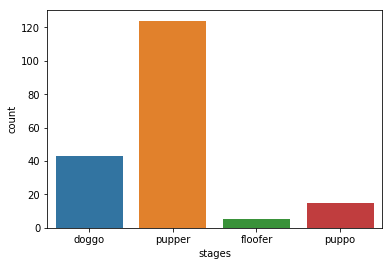

In [5]:
sns.countplot(x='stages',data=Combined)

** Lot of the Stages of the Dog were missing from the Charactestics , leading to lot of Not Avaiable Value which is more than 6 times the second **

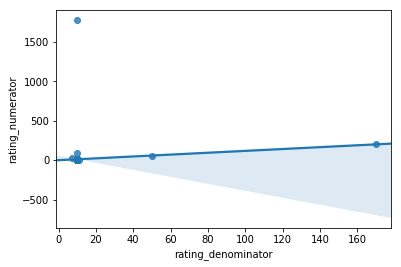

In [7]:
sns.regplot('rating_denominator','rating_numerator',data=Combined)

### Reg plot shows the vast difference between the scores and outliers where the main clusters is around 18 on x axis

(0, 20)

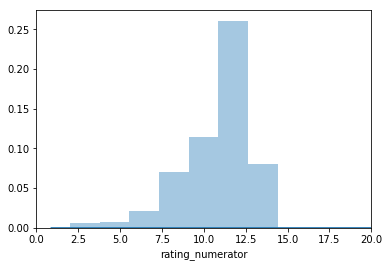

In [17]:
sns.distplot(Combined['rating_numerator'],bins=1000)
plt.xlim(0,20)

### Most of the Rating is 11 or 12 and resemble more like a negatively skewed plot and there are few Outliers which are highly suspicious like 776 or 204 which might be due to human error

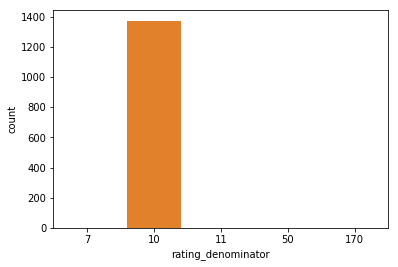

In [18]:
sns.countplot('rating_denominator',data=Combined)

(0, 3)

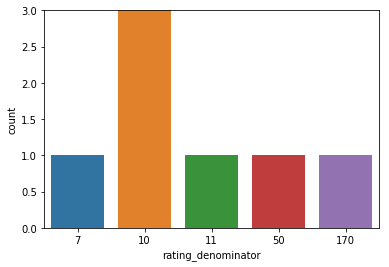

In [20]:
sns.countplot('rating_denominator',data=Combined)
plt.ylim(0,3)

### Almost all of the review is done on 10 scale except for a single cases which could be either error or may be related to context of tweet

(0, 40000)

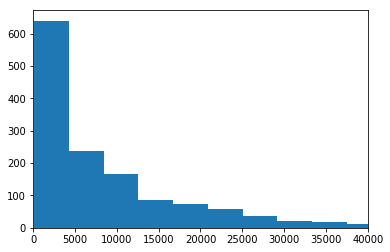

In [21]:
plt.hist(Combined['Like_Count'],bins=30)
plt.xlim(0,40000)


(0, 20000)

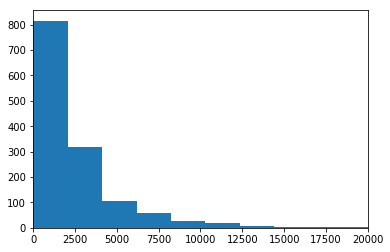

In [22]:
plt.hist(Combined['Retweet_count'],bins=30)
plt.xlim(0,20000)


### Retweet and  Like looks like strongly correlated. Like is always done more than retweet as evident from the plot . Both are positively skewed and gradually comes down from the tip

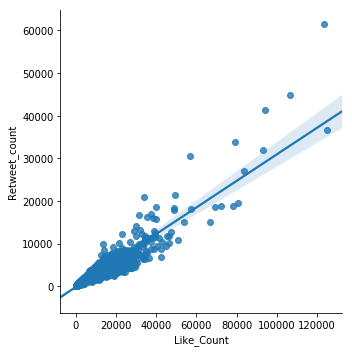

In [23]:
sns.lmplot(x="Like_Count",y="Retweet_count",data=Combined)

### They are definately strongly correlated given by the scatterplot where bulk of values closely following the regressional line

In [24]:
pearsonr(Combined['Retweet_count'],Combined['Like_Count'])



(0.92872170632004714, 0.0)

### Pearson r shows the high 92 percent correlation confirming our Hypothesis